In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
cars_main = pd.read_csv("cars_engage_2022.csv", index_col = 'Unnamed: 0')

In [3]:
print(cars_main.head(10))

     Make      Model  Variant Ex-Showroom_Price Displacement  Cylinders  \
0    Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc        2.0   
1    Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc        2.0   
2    Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc        2.0   
3    Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc        2.0   
4    Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc        2.0   
5    Tata  Nano Genx      Xma      Rs. 3,14,815       624 cc        2.0   
6  Datsun    Redi-Go        D      Rs. 2,79,650       799 cc        3.0   
7  Datsun    Redi-Go        T      Rs. 3,51,832       799 cc        3.0   
8  Datsun    Redi-Go        A      Rs. 3,33,419       799 cc        3.0   
9  Datsun    Redi-Go        S      Rs. 3,62,000       799 cc        3.0   

   Valves_Per_Cylinder               Drivetrain Cylinder_Configuration  \
0                  2.0   RWD (Rear Wheel Drive)                In-line   
1                  2.0   R

In [4]:
cars_main.columns

Index(['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement',
       'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration', 'Emission_Norm',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=140)

In [5]:
cars_main.isnull().sum()

Make                    0
Model                   0
Variant                 0
Ex-Showroom_Price       0
Displacement           12
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 140, dtype: int64

In [6]:
cars_main['Cylinders'].isnull().sum()

#cars_main['Displacement'] = cars_main['Displacement'].fillna(cars_main['Displacement'].mode())
cars_main['Cylinders'] = cars_main['Cylinders'].fillna(cars_main['Cylinders'].mean())
cars_main['Cylinders'].isnull().sum()

0

In [7]:
cars_main['Valves_Per_Cylinder'] = cars_main['Valves_Per_Cylinder'].fillna(cars_main['Valves_Per_Cylinder'].mean())
cars_main['Valves_Per_Cylinder'].isnull().sum()

0

In [8]:
cars_main['Gears'] = cars_main['Gears'].str.extract('(\d+)').astype(float)
cars_main['Gears'].astype(float)
cars_main["Gears"] = cars_main["Gears"].fillna(cars_main['Gears'].mean())
cars_main['Gears'].isnull().sum()

0

In [9]:
#drop_series = ['Power_Seats', 'Keyless_Entry', '12v_Power_Outlet', '']
cars_main['Start_/_Stop_Button'].unique()
cars_main['Start_/_Stop_Button'] = cars_main['Start_/_Stop_Button'].fillna('No')

In [10]:
#seires_list = [ cars_main['Make'], cars_main['Model'], cars_main['Variant'], cars_main['Cylinders'], cars_main['Gears'] ]
#Training_set = pd.concat(seires_list, axis=1)

#encoder = OneHotEncoder(handle_unknown= 'ignore')
#encoder.fit_transform(Training_set)

In [11]:
#cars_encoded_dp = pd.DataFrame(encoder.fit_transform(Training_set).toarray())

In [12]:
#Training_set.join(cars_encoded_dp)

In [13]:
"""new_list = [ cars_main['Ex-Showroom_Price'],
            cars_main['Emission_Norm'],
            cars_main['Fuel_Tank_Capacity'],
            cars_main['Fuel_Type'],
            cars_main['Body_Type'],
            cars_main['City_Mileage'],
            cars_main['Highway_Mileage'],
            cars_main['ARAI_Certified_Mileage'],
            cars_main['Keyless_Entry'],
            cars_main['Power'],
            cars_main['Torque'],
            cars_main['Speedometer'],
            cars_main['Tachometer'],
            cars_main['Type'],
            cars_main['Basic_Warranty'],
            cars_main['Boot_Space'],
            cars_main['Airbags'],
            cars_main['Cruise_Control']
           ]
"""
#Starting with training models
X = cars_main[[
    'Emission_Norm',
    'Fuel_Tank_Capacity',
    'Body_Type',
    'Fuel_Type',
    'City_Mileage',
    'Highway_Mileage',
    'ARAI_Certified_Mileage',
    'Keyless_Entry',
    'Power',
    'Torque',
    'Speedometer',
    'Tachometer',
    'Type',
    'Basic_Warranty',
    'Boot_Space',
    'Airbags',
    'Cruise_Control'
]].values

y = cars_main[['Ex-Showroom_Price']]
#List_cars_encoded = pd.concat(new_list, axis=1)
#List_cars_encoded.join(cars_encoded_dp)

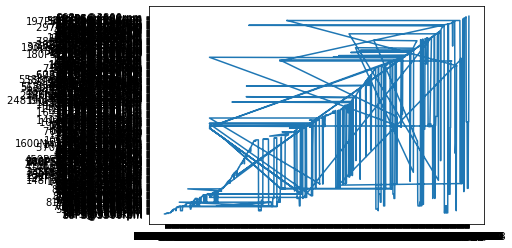

In [14]:
plt.plot(cars_main['Ex-Showroom_Price'], cars_main['Power'])

In [15]:
#[int(s) for s in cars_main['Ex-Showroom_Price'] if s.isdigit()]
#print (cars_main['Ex-Showroom_Price'])
le = LabelEncoder()

In [16]:
for i in range(len(X[0])):
    X[:,i] = le.fit_transform(X[:,i])
    
print (X)

[[2 3 5 ... 2 207 1]
 [2 3 5 ... 2 207 1]
 [2 2 5 ... 2 207 1]
 ...
 [0 10 11 ... 104 16 0]
 [0 10 11 ... 104 89 0]
 [2 54 9 ... 1 111 0]]


In [17]:
y = le.fit_transform(y)
print(y)

[345 326 348 ... 226 146 829]


C:\Users\kaust\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [19]:
#creating models
#KNN
knn = neighbors.KNeighborsClassifier(n_neighbors = 25, weights = 'uniform')

In [20]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [21]:
predictions = knn.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print ("Predictions :", predictions)
print("Testing data ",y_test)

for i in range(len(predictions)):
    print(y_test[i])

Predictions : [ 451  451  586   56  586  541  317   56  275   73  540   16    2  541
 1108  451   56  339  720  651   85    1  856 1128 1128  260 1059  856
  389   74 1108  540  574  106  349  106 1066  507  349  446  646    0
  252  576  856 1108   75   56 1128   67  275  201   75   16   75  158
   66  856   20   73  219 1066  163   56   56  163   12  856  586   73
 1168   73  219   56   68  548  252   16 1168  548   59  349 1168  219
  252  349  125   56   68  541  446  658    6   73  720  260  349  608
  115  586  720   56   56  230 1128  541   56   59   14  517  252    2
   75 1116   24  856   33   56  856  541  227  158  163  442  330  252
    1  201   81   11   33   15  540  856  111  451  517  446  586  443
  252   75   22   61  158  651  349  610  446  521  264 1128  194 1116
  507  163  856   57    1 1116    6  446   56  540   73  100   33   33
  438  158  264 1128   33  252  274  540 1128 1128   68  314 1059  541
  507  230   33  163  521    2  453   56   33 1168   33  517   

In [22]:
print("Accuracy Score :", accuracy)

Accuracy Score : 0.00390625


In [23]:
# Model 2 
model = svm.SVC()

In [24]:
model.fit(X_train, y_train)
print(model)

SVC()


In [25]:
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
print("Predictions :", pred)
print("Accuracy :", acc)

Predictions : [ 607  607 1168 1168 1168  753   33  762 1168  690  856   33 1168  962
 1168  607  762  607  720  753  690 1168  856 1128  867 1168 1059  856
 1168 1168 1168  856 1168 1168  607 1168 1066 1168  607  856  646   33
 1168 1168  856 1168 1168 1168 1128 1168 1168 1168 1168   33 1168 1168
 1168  856   33 1168 1168 1066 1168  690  762 1168   33  856  586  690
 1168  690 1168  690 1168  720 1168   33 1168  753 1168  607 1168 1168
 1168  607 1168  720 1168  962  690  690 1168  690  762 1168  607  762
 1168 1168  762  690  762 1168  630  720 1168 1168 1168  867 1168 1059
 1168 1168 1168  856   33  762  856  753 1168 1168 1168  607 1066 1168
 1066 1168 1168 1066   33 1168 1168  856  872  607 1128  856 1168  607
 1168 1168   33 1168 1168  753  607  720  856  607 1168 1128 1168 1168
 1168 1168  856  867 1168 1168 1168  856 1168  856  690 1168   33 1168
  607 1128 1168 1128   33 1168 1168  856 1128  630 1168   33 1066  753
 1168 1168   33 1168  607 1059  607  872   33 1168   33  867  7

In [26]:
# Model 3
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [27]:
prediction_linear = lin.predict(X_test)
acc_lin = lin.score(X,y)
print("Predictions :", prediction_linear)
print("Accuracy :", acc_lin)

Predictions : [599.81267943 541.13009032 475.71218965 801.34727946 464.41464685
 830.01292018 550.21154993 704.01270464 404.90391536 692.12553511
 899.11969628 300.00051169 535.17468948 769.00103632 495.0426684
 570.04915024 698.65381689 578.62401381 777.339734   858.63068355
 701.69114636 558.48142084 737.84440703 858.09872452 856.2879813
 493.52301674 458.99436635 916.53621385 486.13546103 485.9427345
 502.05764552 901.1639906  605.93038002 596.9108286  374.48466113
 608.32165575 512.67051901 403.73093405 379.96945285 788.57290728
 660.28461387 547.43144322 515.40225813 453.19557348 744.01571015
 464.14826518 553.69241151 833.95471165 893.481756   527.88678704
 411.04965561 580.59143102 464.77624339 417.94022918 571.47454501
 706.76262333 470.49225805 914.05368354 444.15588833 774.31219829
 451.54198655 577.08218354 547.44581015 886.40756265 825.19517259
 488.69048314 550.92760837 908.95030605 303.75412027 665.0434345
 461.02935224 869.33037791 536.41410646 849.44032352 419.54876396


In [28]:
#Model 4
LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train, y_train)

C:\Users\kaust\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [29]:
print("Predictions :", LogReg.predict(X_test));
print("Accuacy :", LogReg.score(X_test, y_test))

Predictions : [ 634  512  713 1018  586  739  453 1149  236 1157  768  680 1056  745
   65  512  869  601  654 1081 1005    7  856  974  760  208  445  936
  959 1159  988  768  574  911  443 1168 1016  507  538  598 1160    3
 1169  697  990   71   77  941  638  716  309  388 1136  439 1153 1154
   94  962   33  875  272  454  411  876  869  213   21  962  437 1145
   63  111  403  115  202  773  252   33 1051  645  893  525 1030  469
 1169  525  125 1049  273  745  603  797    9 1151  791 1059  538  751
 1084  571  762  876 1049  234 1169  744  158 1108   17  674  275  449
  160  350  479 1037  425  869  728 1106  388 1154  500  569  421  252
  683  378  256  629  313 1055  907  856  964  451  517  990  586  536
 1169 1041  411  168  651  929  719  662  725  616  298 1175  266 1085
  486  213  935  458  456 1131  419  856 1169  967  776  228  331  422
  451 1019  503  638   38  508 1169  611 1169 1169 1122  557  316  739
  486 1107  441  146  616  449  542  105  339 1040  331  662 10

In [33]:
#Decision tree
treere = DecisionTreeRegressor()
treere.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
print("Predictions :", treere.predict(X_test));
print("Accuacy :", treere.score(X_test, y_test))

Predictions : [ 634.          512.          765.         1036.          586.
  796.5         438.          602.5         378.         1145.
  866.          509.          743.          755.           83.5
  512.          667.          512.          846.         1081.
 1099.            4.          691.5         690.          760.
  272.5         431.          909.          959.          616.5
 1133.          866.          492.          839.          443.
  919.33333333  822.          507.          538.          685.
  798.            3.          472.          697.          890.5
  593.5         126.          941.          658.          992.
  507.          504.          622.          511.         1153.
  663.          211.          866.          953.          664.
  258.           10.          411.          931.         1092.
  213.           21.          611.           27.         1145.
   63.          111.          403.         1128.          202.
  773.          239.            4.    

In [41]:
#Random Forest
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
print("Predictions :", clf.predict(X_test));
print("Accuacy :", clf.score(X_test, y_test))

Predictions : [ 630.22        627.32216667  752.64866667 1038.4575      603.135
  802.69916667  438.06607143  609.535       307.44552381  917.98433333
  834.494       202.72        649.63233333  745.49761905   80.80185317
  620.83216667  697.3         629.453       762.08       1027.67
  984.2855      308.31109524  704.03816667  866.0605      774.76333333
  297.09383333  427.22        888.69691667  791.92        610.36333333
  974.63333333  836.924       578.00583333  854.82        464.534
  797.2975      531.26935714  562.59047619  525.654       684.72114286
  831.34266667  185.07814286  491.7475      674.81416667  905.87666667
  562.53155556  174.27677778  948.37083333  695.97833333  643.72785714
  586.17433333  523.88633333  644.444       450.18666667  806.785
  821.39666667  223.55        827.02490079  523.35333333  816.06733333
  253.05933333  472.39833333  420.3725      759.13416667  857.08169048
  196.06190476  280.46642857  657.79        324.26       1054.25833333
  296.5816666